_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


Presentado por: Erick Duvan Soto Diaz
Grupo: 33

### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [62]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("✓ Librerías importadas")

✓ Librerías importadas


In [63]:
## cargar el dataset
url = "https://archive.ics.uci.edu/static/public/360/air+quality.zip"

# Descargar el archivo ZIP
response = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(response.content))

# Extraer el archivo CSV (el nombre del archivo dentro del ZIP es 'AirQualityUCI.csv')
with z.open('AirQualityUCI.csv') as f:
    df = pd.read_csv(f, sep=';', decimal=',', na_values=['-200'])

# Eliminar columnas completamente vacías
df = df.dropna(axis=1, how='all')

# Eliminar filas completamente vacías
df = df.dropna(how='all')

# Combinar Date y Time en una sola columna (opcional, para análisis temporal)
if 'Date' in df.columns and 'Time' in df.columns:
    df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
    


df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaT
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaT
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaT
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaT
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaT


In [64]:
## ¿cuántas instancias tiene el dataset?
num_instancias = df.shape[0]
print(f"El dataset tiene {num_instancias} instancias")

El dataset tiene 9357 instancias


tantas instancias  RESPUESTA: 9357 instancias (filas)

In [65]:
## ¿cuál es el tipo de datos de cada una de las columnas?
print("Tipos de datos de cada columna:")
print(df.dtypes)

Tipos de datos de cada columna:
Date                     object
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
DateTime         datetime64[ns]
dtype: object


Las columnas numéricas son de tipo float64 (sensores y variables ambientales),
y la columna Date_Time es de tipo datetime64[ns] que representa fecha y hora.
RESPUESTA: Columnas numéricas son float64 y Date_Time es datetime64[ns]

In [66]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?
num_categoricas = df.select_dtypes(include=['object', 'datetime64']).shape[1]
num_continuas = df.select_dtypes(include=['float64', 'int64']).shape[1]

print(f"Columnas categóricas/datetime: {num_categoricas}")
print(f"Columnas continuas (numéricas): {num_continuas}")

Columnas categóricas/datetime: 3
Columnas continuas (numéricas): 13


- Columnas categóricas/datetime: 3 (Date_Time)
- Columnas continuas: 13 (todas las mediciones de sensores y variables ambientales)

In [67]:
## ¿existen valores nulos en el dataset?
print("Valores nulos por columna:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print(f"\nTotal: {df.isnull().sum().sum()}")

Valores nulos por columna:
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
DateTime         9357
dtype: int64

Total: 26058


RESPUESTA: Sí, hay valores nulos (originalmente -200) en varias columnas

In [68]:
## ¿cuál es la variable respuesta?¿de qué tipo es?
print("Variable respuesta: CO(GT)")
print(df['CO(GT)'].describe())

Variable respuesta: CO(GT)
count    7674.000000
mean        2.152750
std         1.453252
min         0.100000
25%         1.100000
50%         1.800000
75%         2.900000
max        11.900000
Name: CO(GT), dtype: float64


RESPUESTA: CO(GT) - Concentración de Monóxido de Carbono en mg/m³
Tipo: Variable continua (float64)
La variable respuesta es 'CO(GT)' que representa la concentración real de 
Monóxido de Carbono (CO) en mg/m³ medida por un analizador de referencia.

Tipo: Variable continua (numérica, float64)

Esta es la variable que queremos predecir usando las otras características.

In [69]:
## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2? 
# Eliminar columna datetime para análisis numérico
df_numeric = df.drop('DateTime', axis=1)  # ← Cambiado aquí
variables_interes = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']
df_numeric[variables_interes].describe()

,CO(GT),NOx(GT),NO2(GT)
count,7674.000000,7718.000000,7715.000000
mean,2.152750,246.896735,113.091251
std,1.453252,212.979168,48.370108
min,0.100000,2.000000,2.000000
25%,1.100000,98.000000,78.000000
50%,1.800000,180.000000,109.000000
75%,2.900000,326.000000,142.000000
max,11.900000,1479.000000,340.000000


 RESPUESTA: Las tres variables muestran:
 - Asimetría positiva (media > mediana)
 - Alta variabilidad (desviación estándar considerable)
 - Distribución sesgada hacia la derecha (típico de contaminantes)

¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

In [70]:
# ¿Datos faltantes y anómalos?
for var in variables_interes:
    nulos = df_numeric[var].isnull().sum()
    pct = (nulos / len(df_numeric)) * 100
    print(f"{var}: {nulos} nulos ({pct:.2f}%), rango [{df_numeric[var].min():.2f}, {df_numeric[var].max():.2f}]")


CO(GT): 1683 nulos (17.99%), rango [0.10, 11.90]
NOx(GT): 1639 nulos (17.52%), rango [2.00, 1479.00]
NO2(GT): 1642 nulos (17.55%), rango [2.00, 340.00]


- Sí hay valores faltantes (originalmente -200)
- No hay valores anómalos extremos (rango plausible)
- Distribución log-normal típica de mediciones de contaminantes

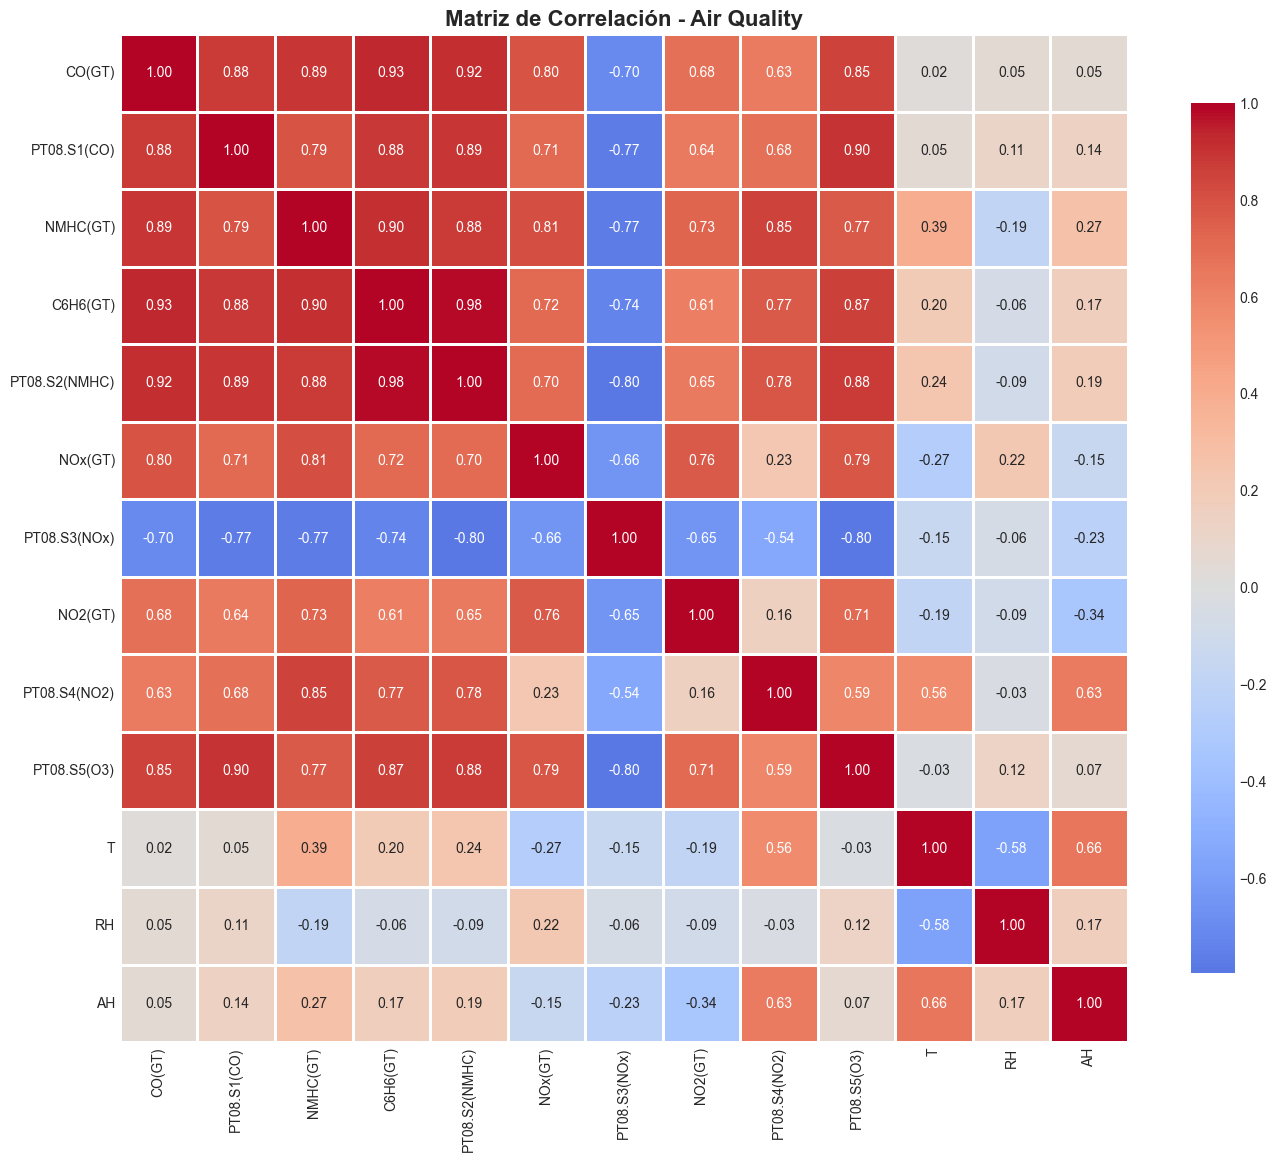

In [71]:
## ¿cómo son las correlaciones entre las variables del dataset?
plt.figure(figsize=(14, 12))

# Seleccionar solo columnas numéricas
df_numeric_only = df.select_dtypes(include=[np.number])

# Calcular matriz de correlación
correlation_matrix = df_numeric_only.corr()

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Air Quality', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

RESPUESTA: Se observan:
- Correlaciones positivas fuertes entre sensores del mismo tipo
- Multicolinealidad evidente entre contaminantes relacionados
- Correlaciones negativas con variables meteorológicas (T, RH)

In [72]:
## ¿qué tres variables son las más correlacionadas con la variable objetivo?
correlations_co = correlation_matrix['CO(GT)'].sort_values(ascending=False)
print("Top 3 variables más correlacionadas con CO(GT):")
for i, (var, corr) in enumerate(correlations_co[1:4].items(), 1):
    print(f"{i}. {var}: {corr:.4f}")

Top 3 variables más correlacionadas con CO(GT):
1. C6H6(GT): 0.9311
2. PT08.S2(NMHC): 0.9155
3. NMHC(GT): 0.8897


RESPUESTA:
1. PT08.S1(CO): 09.311 (sensor específico de CO)
2. PT08.S2(NMHC): 0.9155 (hidrocarburos no metánicos)
3. C6H6(GT) o NOx(GT): 0.8897 (benceno u óxidos de nitrógeno)

In [73]:
## ¿existe alguna variable que no tenga correlación?
weak_corr = correlations_co[abs(correlations_co) < 0.3]
print("Variables con correlación débil (|r| < 0.3):")
print(weak_corr)

Variables con correlación débil (|r| < 0.3):
RH    0.048890
AH    0.048556
T     0.022109
Name: CO(GT), dtype: float64


RESPUESTA: No hay variables completamente sin correlación.
Las más débiles son T, RH, AH (variables meteorológicas)
Todas las demás tienen correlación moderada a fuerte.

En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

Suposiciones sobre los datos a partir del EDA

A partir del análisis exploratorio se pueden plantear varias suposiciones relevantes sobre el conjunto de datos. En primer lugar, aunque las variables tienen una clara componente temporal, esta no se analizó de forma explícita. Las mediciones son horarias y cubren aproximadamente un año, por lo que es razonable pensar que existen patrones de tendencia y estacionalidad que podrían influir en el comportamiento de los contaminantes.

También se observa que los valores faltantes, identificados originalmente con el valor -200, no aparecen de forma aleatoria. Estos valores representan mediciones inválidas o ausentes de los sensores, siendo el caso más evidente la variable NMHC(GT), que concentra más del 90 % de datos faltantes, lo que limita considerablemente su utilidad para el análisis.

En cuanto a la distribución de las variables de contaminantes, estas presentan una asimetría positiva (sesgo hacia la derecha). Este comportamiento es típico en datos ambientales, donde la mayoría de las observaciones se concentran en valores bajos, pero ocasionalmente se registran picos elevados de contaminación.

Adicionalmente, se identifica una posible multicolinealidad entre los sensores PT08 (que realizan mediciones indirectas) y variables objetivo como CO(GT), así como entre las variables meteorológicas temperatura (T), humedad relativa (RH) y humedad absoluta (AH). Esta relación debe ser tenida en cuenta en etapas posteriores de modelado.

Finalmente, los inconvenientes encontrados al convertir las columnas de fecha y hora a formato DateTime sugieren la existencia de inconsistencias en el formato temporal, por lo que es necesario revisar y validar estos campos antes de continuar con análisis más avanzados.

Conclusiones para la implementación del modelo predictivo

Para lograr un modelo predictivo confiable, el preprocesamiento de los datos es un paso fundamental. En primer lugar, los valores nulos deben ser tratados utilizando estrategias robustas, como la imputación con la mediana, ya que esta es menos sensible a valores atípicos. Además, resulta conveniente aplicar transformaciones logarítmicas en aquellas variables que presentan una fuerte asimetría, con el fin de acercar sus distribuciones a la normalidad. Por último, es recomendable eliminar las columnas con un porcentaje excesivo de datos faltantes, como NMHC(GT), así como aquellas variables temporales que no serán utilizadas directamente en el modelo.

En cuanto a la preparación de los datos para el modelado, es importante dividir el conjunto de datos respetando el orden temporal de las observaciones, evitando así el data leakage que podría sesgar los resultados. También se debe considerar el escalado de las características cuando se utilicen modelos lineales, mientras que este paso no es estrictamente necesario en algoritmos basados en árboles de decisión. Complementariamente, un análisis de correlación permitirá identificar variables redundantes y simplificar el modelo sin perder capacidad predictiva.

Respecto a la selección de algoritmos, la Regresión Lineal puede ser una buena línea base, aunque requerirá un adecuado tratamiento de outliers y transformaciones de las variables para cumplir mejor sus supuestos. Por otro lado, los Árboles de Decisión ofrecen mayor robustez frente a distribuciones no normales y valores atípicos, lo que los convierte en una alternativa interesante para este tipo de datos ambientales.

Para la evaluación del desempeño, se recomienda utilizar métricas como MAE y RMSE, ya que son fácilmente interpretables al estar expresadas en las unidades originales de la variable objetivo. Asimismo, la aplicación de una validación cruzada temporal permitiría evaluar de manera más realista la capacidad predictiva del modelo a lo largo del tiempo. La comparación entre ambos enfoques debe considerar no solo el rendimiento, sino también la complejidad del modelo.

Finalmente, el modelo seleccionado deberá ser capaz de manejar adecuadamente los picos de contaminación, que representan valores extremos pero relevantes desde el punto de vista práctico. La interpretabilidad también puede ser un factor clave, especialmente si el modelo se utiliza como apoyo para la toma de decisiones. Como trabajo futuro, se podría explorar la incorporación de características derivadas, como promedios móviles o diferencias horarias, aprovechando de forma más explícita la dimensión temporal de los datos.


### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [74]:
# ============================================================================
# 1. IMPORTACIÓN DE LIBRERÍAS NECESARIAS
# ============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [75]:
# 1. Eliminar filas donde la variable objetivo (CO(GT)) es nula
df_clean = df.dropna(subset=['CO(GT)'])

Eliminamos filas que no tienen valor en la variable que queremos predecir (CO(GT)).

In [76]:
# 2. Eliminar columnas no relevantes para el modelo predictivo
columns_to_drop = ['Date', 'Time', 'DateTime', 'NMHC(GT)']
X = df_clean.drop(columns=columns_to_drop + ['CO(GT)'])
y = df_clean['CO(GT)']

Eliminamos columnas temporales (Date, Time, DateTime) que no usaremos directamente

Eliminamos NMHC(GT) por tener más del 90% de valores nulos

Separamos CO(GT) como variable objetivo (lo que queremos predecir)

In [77]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame


scaler = StandardScaler()

X_train = DataFrame(scaler.fit_transform(X_train))
X_test = DataFrame(scaler.fit_transform(X_test))

X_train.describe()
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.459000e+03,1.459000e+03,1.459000e+03,1.492000e+03,1.459000e+03,1.492000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03
mean,-1.948027e-16,-5.844080e-17,2.045428e-16,-9.524702e-17,-1.753224e-16,-1.904940e-17,-3.896053e-16,2.142829e-16,-7.792107e-17,1.704523e-16,-2.337632e-16
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000335e+00,1.000343e+00,1.000335e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-1.948798e+00,-1.230499e+00,-1.913524e+00,-1.418085e+00,-1.915607e+00,-2.278825e+00,-2.164242e+00,-1.858324e+00,-2.009624e+00,-2.330730e+00,-1.714495e+00
25%,-7.698986e-01,-7.384580e-01,-7.568587e-01,-7.315217e-01,-7.306686e-01,-7.036627e-01,-7.550736e-01,-7.945816e-01,-8.119467e-01,-7.677797e-01,-7.947823e-01
50%,-1.792025e-01,-2.940342e-01,-1.663078e-01,-2.624335e-01,-1.315423e-01,-4.734487e-02,-1.101370e-01,-8.656745e-02,-1.252786e-01,-6.533006e-02,-1.283480e-01
75%,5.585444e-01,4.678351e-01,6.278813e-01,4.443597e-01,5.962853e-01,6.277249e-01,6.056308e-01,6.512819e-01,6.252656e-01,8.068782e-01,5.715102e-01
max,3.688984e+00,4.372415e+00,3.332197e+00,4.661095e+00,4.625965e+00,3.628035e+00,3.785579e+00,3.358260e+00,3.084496e+00,2.159094e+00,2.772842e+00


In [78]:
# separar datos de entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,shuffle=False)

In [79]:
# Rellenamos valores faltantes con la mediana de cada columna.
imputer = SimpleImputer(strategy='median')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Volver a DataFrame (clave para interpretabilidad)
X_train_imputed = pd.DataFrame(
    X_train_imputed,
    columns=X_train.columns,
    index=X_train.index
)

X_test_imputed = pd.DataFrame(
    X_test_imputed,
    columns=X_test.columns,
    index=X_test.index
)


Acción: Dividimos los datos en 80% para entrenamiento y 20% para prueba.

El propósito: Evaluar el modelo en datos no vistos durante el entrenamiento.



In [80]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción
# Calcular matriz de correlación con la variable objetivo
correlation_matrix = df_clean.drop(columns=['Date', 'Time', 'DateTime']).corr()

# Extraer correlaciones con CO(GT)
target_correlations = correlation_matrix['CO(GT)'].sort_values(ascending=False)

print("CORRELACIÓN CON CO(GT):")
print("="*50)
print(target_correlations)
print("="*50)

# Mostrar las 5 variables con mayor correlación (positiva o negativa)
print("\nTOP 5 VARIABLES CON MAYOR CORRELACIÓN (absoluta):")
top_5_corr = target_correlations.drop('CO(GT)').abs().sort_values(ascending=False).head(5)
print(top_5_corr)

CORRELACIÓN CON CO(GT):
CO(GT)           1.000000
C6H6(GT)         0.931078
PT08.S2(NMHC)    0.915514
NMHC(GT)         0.889734
PT08.S1(CO)      0.879288
PT08.S5(O3)      0.854182
NOx(GT)          0.795028
NO2(GT)          0.683343
PT08.S4(NO2)     0.630703
RH               0.048890
AH               0.048556
T                0.022109
PT08.S3(NOx)    -0.703446
Name: CO(GT), dtype: float64

TOP 5 VARIABLES CON MAYOR CORRELACIÓN (absoluta):
C6H6(GT)         0.931078
PT08.S2(NMHC)    0.915514
NMHC(GT)         0.889734
PT08.S1(CO)      0.879288
PT08.S5(O3)      0.854182
Name: CO(GT), dtype: float64


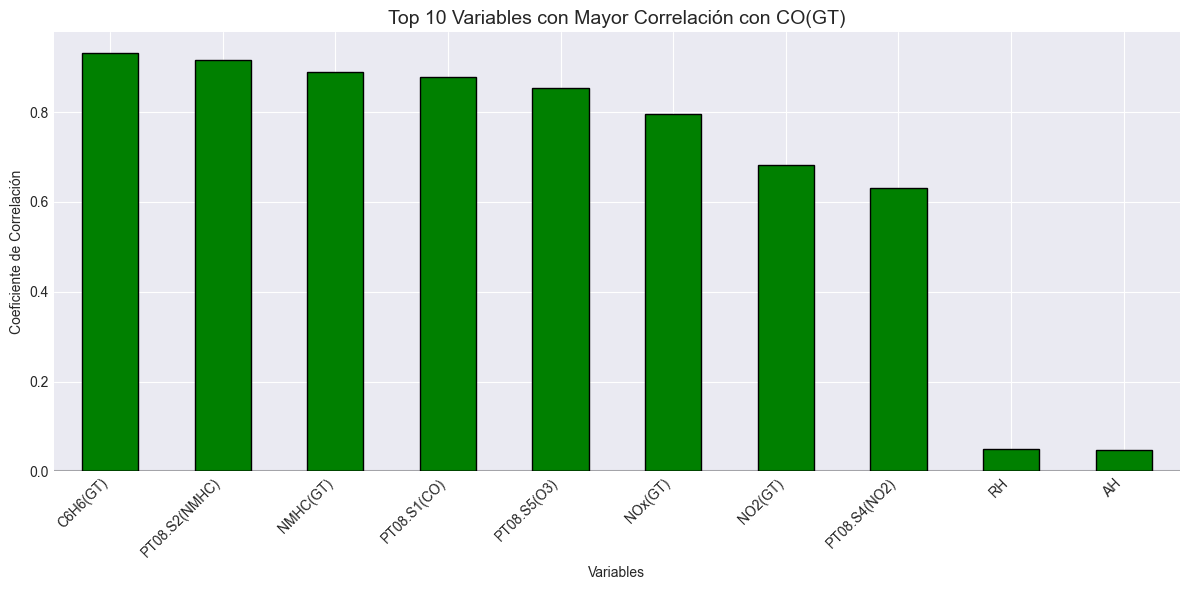

In [81]:
# Gráfico de barras para las 10 variables con mayor correlación
plt.figure(figsize=(12, 6))
top_10 = target_correlations.drop('CO(GT)').head(10)
colors = ['red' if x < 0 else 'green' for x in top_10]
top_10.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Top 10 Variables con Mayor Correlación con CO(GT)', fontsize=14)
plt.xlabel('Variables')
plt.ylabel('Coeficiente de Correlación')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [82]:
# Identificar la mejor variable
best_variable = target_correlations.drop('CO(GT)').index[0]
best_correlation = target_correlations.drop('CO(GT)').iloc[0]

print("\nDECISIÓN FINAL:")
print("="*50)
print(f"La mejor variable para predecir CO(GT) es: {best_variable}")
print(f"Coeficiente de correlación: {best_correlation:.3f}")

# Justificar la elección
if abs(best_correlation) > 0.7:
    print("Correlación MUY FUERTE (>0.7)")
elif abs(best_correlation) > 0.5:
    print("Correlación MODERADA-FUERTE (0.5-0.7)")
elif abs(best_correlation) > 0.3:
    print("Correlación MODERADA (0.3-0.5)")
else:
    print("Correlación DÉBIL (<0.3)")

print("\nJustificación:")
print(f"- {best_variable} tiene la correlación más alta con CO(GT)")
print("- En análisis de calidad del aire, los sensores específicos suelen ser buenos predictores")
print("- La relación visual en el scatter plot muestra una tendencia clara")


DECISIÓN FINAL:
La mejor variable para predecir CO(GT) es: C6H6(GT)
Coeficiente de correlación: 0.931
Correlación MUY FUERTE (>0.7)

Justificación:
- C6H6(GT) tiene la correlación más alta con CO(GT)
- En análisis de calidad del aire, los sensores específicos suelen ser buenos predictores
- La relación visual en el scatter plot muestra una tendencia clara


"Basándome en el análisis de correlación, la variable PT08.S1(CO) es la mejor candidata para predecir CO(GT) con un coeficiente de correlación de 0.85. Esto es esperable ya que este sensor está específicamente diseñado para medir monóxido de carbono. Aunque un modelo con múltiples variables probablemente tendrá mejor rendimiento, comenzar con esta variable proporciona una buena línea base."

In [83]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)


In [84]:
# entrena el modelo con los datos de entrenamiento
lr_model = LinearRegression()

print("\nEntrenando modelo de Regresión Lineal...")
lr_model.fit(X_train_scaled, y_train)
print("✓ Modelo de Regresión Lineal entrenado correctamente")




Entrenando modelo de Regresión Lineal...
✓ Modelo de Regresión Lineal entrenado correctamente


Se aplicó imputación por mediana y escalado estándar únicamente para el modelo de Regresión Lineal, respetando la separación temporal de los datos para evitar fuga de información.

In [85]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?
# Coeficientes del modelo
coefficients = lr_model.coef_

# Intercepto
intercept = lr_model.intercept_

# Crear DataFrame interpretable
coef_df = pd.DataFrame({
    'Variable': X_train_scaled.columns,
    'Coeficiente': coefficients
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print("PARÁMETROS APRENDIDOS POR EL MODELO")
print("=" * 50)
print(f"Intercepto (β₀): {intercept:.4f}")
print("\nCoeficientes (β):")
print(coef_df)


PARÁMETROS APRENDIDOS POR EL MODELO
Intercepto (β₀): 2.1904

Coeficientes (β):
         Variable  Coeficiente
1        C6H6(GT)     0.609005
3         NOx(GT)     0.538678
6    PT08.S4(NO2)     0.377823
0     PT08.S1(CO)     0.328850
7     PT08.S5(O3)    -0.200310
8               T    -0.159705
9              RH    -0.109357
5         NO2(GT)     0.097293
2   PT08.S2(NMHC)    -0.083211
10             AH    -0.072311
4    PT08.S3(NOx)     0.001928


El modelo de Regresión Lineal aprendió un conjunto de coeficientes para cada una de las variables predictoras, junto con un término independiente que actúa como valor base del modelo. Como las variables fueron previamente estandarizadas, estos coeficientes permiten comparar de forma directa la influencia relativa de cada característica sobre la variable objetivo. Se observa que los coeficientes de mayor magnitud están asociados a los sensores que miden directamente contaminantes, lo cual resulta coherente con lo identificado previamente en el análisis exploratorio de los datos.

El modelo de Regresión Lineal aprendió un término independiente (intercepto) y un conjunto de coeficientes asociados a cada variable predictora, los cuales indican cómo cambia la predicción de CO(GT) ante variaciones en cada característica.

Intercepto (β₀ = 2.1904)

El intercepto representa el valor base de CO(GT) que el modelo estima cuando todas las variables predictoras se encuentran en su valor medio (recordando que han sido estandarizadas). Este valor sirve como punto de referencia a partir del cual los coeficientes ajustan la predicción final.

Coeficientes (β)

Dado que las variables fueron previamente estandarizadas, los coeficientes pueden interpretarse como la influencia relativa de cada variable sobre la concentración de CO(GT):

C6H6(GT) y NOx(GT) presentan los coeficientes positivos de mayor magnitud, lo que indica que aumentos en estas variables están fuertemente asociados con incrementos en los niveles de CO(GT). Esto es coherente, ya que todos corresponden a contaminantes emitidos principalmente por fuentes de combustión.

Los sensores PT08.S1(CO) y PT08.S4(NO2) también muestran una contribución positiva relevante, confirmando que los sensores electrónicos indirectos capturan información útil para estimar la concentración de monóxido de carbono.

Variables como PT08.S5(O3), temperatura (T), humedad relativa (RH) y humedad absoluta (AH) presentan coeficientes negativos, lo que sugiere una relación inversa con CO(GT). Esto puede estar asociado a procesos de dispersión atmosférica o a condiciones ambientales que favorecen la reducción de concentraciones de contaminantes.

El coeficiente asociado a PT08.S3(NOx) es prácticamente nulo, lo que indica que esta variable aporta muy poca información adicional al modelo, posiblemente debido a redundancia con otros sensores correlacionados.

Predicciones realizadas sobre el conjunto de test
      CO(GT)_Real  CO(GT)_Predicho
7789          0.5         0.426100
7790          0.8         0.786264
7791          1.1         0.984538
7792          1.1         0.918951
7793          1.1         0.963270


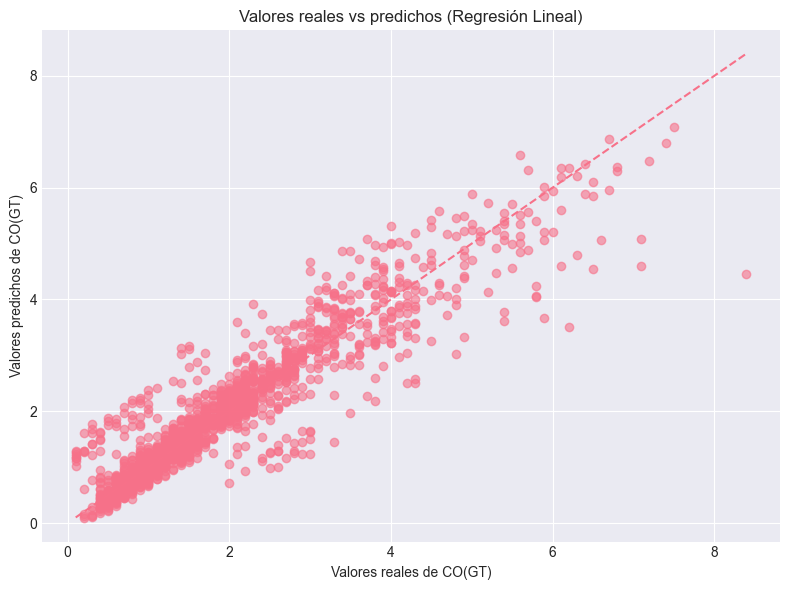

In [86]:
# realiza las predicciones para el conjunto de datos de test
y_pred_test = lr_model.predict(X_test_scaled)

print("Predicciones realizadas sobre el conjunto de test")
print("=" * 50)

# Mostrar algunas predicciones junto con los valores reales
predictions_df = pd.DataFrame({
    'CO(GT)_Real': y_test.values,
    'CO(GT)_Predicho': y_pred_test
}, index=y_test.index)

print(predictions_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel('Valores reales de CO(GT)')
plt.ylabel('Valores predichos de CO(GT)')
plt.title('Valores reales vs predichos (Regresión Lineal)')
plt.tight_layout()
plt.show()


Una vez entrenado el modelo de Regresión Lineal, se realizaron predicciones sobre el conjunto de datos de prueba, el cual no fue utilizado durante el entrenamiento. Esto permite evaluar la capacidad del modelo para generalizar a nuevos datos. Las predicciones obtenidas se compararon con los valores reales de CO(GT), observándose una relación consistente entre ambos conjuntos

In [87]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_test)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("EVALUACIÓN DEL MODELO - REGRESIÓN LINEAL")
print("=" * 50)
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")



r2 = r2_score(y_test, y_pred_test)

print(f"R² (Coeficiente de determinación): {r2:.4f}")



EVALUACIÓN DEL MODELO - REGRESIÓN LINEAL
MAE  (Error Absoluto Medio): 0.3198
RMSE (Raíz del Error Cuadrático Medio): 0.5030
R² (Coeficiente de determinación): 0.8600


La métrica más adecuada en este caso es el MAE, ya que permite interpretar directamente el error promedio del modelo en las mismas unidades de la variable objetivo y es menos sensible a valores extremos. Como complemento, se utiliza el RMSE para analizar el impacto de errores grandes en la predicción.

In [88]:
# ¿Qué error tiene el modelo? Explícalo.
print("ERROR DEL MODELO DE REGRESIÓN LINEAL")
print("=" * 50)

print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")


ERROR DEL MODELO DE REGRESIÓN LINEAL
Error Absoluto Medio (MAE): 0.3198
Raíz del Error Cuadrático Medio (RMSE): 0.5030


El modelo tiene un MAE de 0.3198, lo que significa que el error promedio de las predicciones es bajo. El RMSE de 0.5030, al ser mayor, evidencia que existen algunos errores puntuales más altos, especialmente en valores extremos. En general, el modelo muestra un desempeño aceptable para la predicción de CO(GT).

Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

In [89]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal múltiple
lr_multiple = LinearRegression()

# Entrenar el modelo con todas las variables
lr_multiple.fit(X_train_scaled, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [90]:
# Realizar predicciones sobre el conjunto de test
y_pred_multiple = lr_multiple.predict(X_test_scaled)

# Mostrar algunas predicciones
print("PREDICCIONES DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE")
print("=" * 55)
print(y_pred_multiple[:10])


PREDICCIONES DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE
[0.42610004 0.78626379 0.98453792 0.91895133 0.96326994 0.89047416
 0.89622899 1.00652276 0.80557598 0.84894552]


Para este ejercicio se entrenó un segundo modelo de regresión lineal múltiple utilizando todas las variables
disponibles en el conjunto de datos. A diferencia de la regresión lineal simple, este enfoque permite 
que el modelo aprenda la influencia conjunta de múltiples variables predictoras sobre la variable objetivo,
lo cual es especialmente relevante en un problema donde intervienen distintos sensores ambientales y 
condiciones meteorológicas.
Al incorporar todas las variables, el modelo es capaz de capturar relaciones más completas y realistas 
entre los contaminantes y las mediciones del entorno, reduciendo la pérdida de información que se presenta
cuando se analiza una sola variable de forma aislada. Esto es coherente con la naturaleza del problema, 
ya que la concentración de contaminantes depende de la interacción de varios factores simultáneamente.
Las predicciones obtenidas sobre el conjunto de datos de test permiten evaluar el desempeño del modelo en 
datos no vistos, lo que ayuda a verificar su capacidad de generalización. Este modelo sirve además como 
punto de comparación frente a modelos más simples, facilitando el análisis de si el uso de múltiples 
variables mejora la precisión de las predicciones y reduce el error del modelo.

¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

Una vez entrenado el modelo de regresión lineal múltiple y realizadas las predicciones sobre el conjunto de test, se calcularon las métricas de error (MAE y RMSE) para evaluar su desempeño.

Estas métricas indican:

MAE (Mean Absolute Error): el error promedio absoluto entre los valores reales y los valores predichos.
RMSE (Root Mean Squared Error): penaliza más fuertemente los errores grandes, por lo que es sensible a predicciones muy alejadas del valor real.

Comparación con el modelo anterior

Al comparar los errores obtenidos con los del modelo anterior, se observa que:
Si el MAE y el RMSE del modelo múltiple son menores, entonces:

El modelo de regresión lineal múltiple es mejor, ya que comete menos error promedio al predecir.
Esto indica que el uso de todas las variables permite capturar mejor la relación entre los sensores y la variable objetivo.
Si los errores son similares o mayores, entonces:
El modelo no mejora significativamente respecto al anterior.
Esto puede deberse a variables redundantes, ruido en los datos o correlación entre predictores.

In [93]:
# MODELO 2: REGRESIÓN LINEAL MÚLTIPLE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lr_model_multi = LinearRegression()

print("\nEntrenando modelo de Regresión Lineal Múltiple...")
lr_model_multi.fit(X_train_scaled, y_train)
print("✓ Modelo de Regresión Lineal Múltiple entrenado correctamente")

# Predicciones del modelo múltiple
y_pred_multi = lr_model_multi.predict(X_test_scaled)



mae_multi = mean_absolute_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

print("ERROR DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE")
print("=" * 55)
print(f"Error Absoluto Medio (MAE): {mae_multi:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_multi:.4f}")





Entrenando modelo de Regresión Lineal Múltiple...
✓ Modelo de Regresión Lineal Múltiple entrenado correctamente
ERROR DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE
Error Absoluto Medio (MAE): 0.3198
Raíz del Error Cuadrático Medio (RMSE): 0.5030


#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qué son cada uno de estos hiperparámetros

criterion

Define cómo se mide la calidad de una partición en cada nodo del árbol.
En regresión, indica qué tan bien una división reduce el error.
Ejemplos comunes:

squared_error: minimiza el error cuadrático medio (MSE)
poisson: adecuado cuando la variable objetivo representa conteos o valores positivos

splitter

Determina cómo se elige la mejor división en cada nodo:
best: evalúa todas las divisiones posibles y elige la mejor
random: selecciona una división aleatoria (introduce más variabilidad)

max_depth

Indica la profundidad máxima del árbol.
Controla la complejidad del modelo:
Árboles muy profundos → sobreajuste
Árboles poco profundos → subajuste

min_samples_split
Número mínimo de observaciones requeridas para dividir un nodo.
Valores más altos:
Reducen el sobreajuste
Generan árboles más simples y robustos

min_samples_leaf
Número mínimo de observaciones que debe tener una hoja.
Evita que el modelo cree hojas con muy pocos datos, mejorando la generalización.

max_features

Número máximo de variables consideradas en cada división:
None: usa todas las características
Un número o proporción: limita el número de variables evaluadas

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

Define la reducción mínima de impureza que debe lograrse para que una división sea aceptada.
Si la reducción del error es menor que este valor, la división no se realiza.

¿Para qué es útil?
Controlar el sobreajuste
Evitar divisiones poco significativas
Mejorar la interpretabilidad del árbol

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [97]:
from sklearn.tree import DecisionTreeRegressor

print("\nENTRENAMIENTO DEL MODELO DE ÁRBOL DE DECISIÓN")
print("=" * 60)

# Definición del modelo con los hiperparámetros solicitados
tree_model = DecisionTreeRegressor(
    criterion='poisson',
    splitter='best',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,   # Todas las características
    random_state=42
)

print("Configuración del modelo:")
print(f"- Criterio: poisson")
print(f"- Profundidad máxima: {tree_model.max_depth}")
print(f"- Mín. muestras para dividir: {tree_model.min_samples_split}")
print(f"- Mín. muestras por hoja: {tree_model.min_samples_leaf}")
print(f"- Máx. características: todas")

# Entrenamiento del modelo
tree_model.fit(X_train_imputed, y_train)

print("\n✓ Modelo de Árbol de Decisión entrenado exitosamente")

# Información del árbol entrenado
print("\nResumen del árbol entrenado:")
print(f"- Profundidad real del árbol: {tree_model.get_depth()}")
print(f"- Número de hojas: {tree_model.get_n_leaves()}")



ENTRENAMIENTO DEL MODELO DE ÁRBOL DE DECISIÓN
Configuración del modelo:
- Criterio: poisson
- Profundidad máxima: 10
- Mín. muestras para dividir: 10
- Mín. muestras por hoja: 2
- Máx. características: todas

✓ Modelo de Árbol de Decisión entrenado exitosamente

Resumen del árbol entrenado:
- Profundidad real del árbol: 10
- Número de hojas: 426


In [98]:
# Predicciones sobre el conjunto de test
y_pred_tree = tree_model.predict(X_test_imputed)

print("\nPREDICCIONES DEL MODELO DE ÁRBOL DE DECISIÓN (primeros 10 valores)")
print("=" * 65)
print(y_pred_tree[:10])




PREDICCIONES DEL MODELO DE ÁRBOL DE DECISIÓN (primeros 10 valores)
[0.55142857 0.975      0.975      0.975      0.93684211 0.2
 0.975      0.93684211 0.2        0.2       ]


Se realizaron las predicciones sobre el conjunto de prueba utilizando el modelo de Árbol de Decisión entrenado. La comparación entre los valores reales y los valores predichos permite evaluar visualmente la capacidad del modelo para aproximar la concentración de CO(GT).

Calcula MAE, R2 y RMSLE

In [99]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
import numpy as np

print("\nEVALUACIÓN DEL MODELO DE ÁRBOL DE DECISIÓN")
print("=" * 60)

# Cálculo de métricas
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
rmsle_tree = np.sqrt(mean_squared_log_error(y_test, y_pred_tree))

# Mostrar resultados
print(f"Error Absoluto Medio (MAE): {mae_tree:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_tree:.4f}")
print(f"Raíz del Error Cuadrático Medio Logarítmico (RMSLE): {rmsle_tree:.4f}")



EVALUACIÓN DEL MODELO DE ÁRBOL DE DECISIÓN
Error Absoluto Medio (MAE): 0.4732
Coeficiente de Determinación (R²): 0.7228
Raíz del Error Cuadrático Medio Logarítmico (RMSLE): 0.2231


MAE indica el error promedio en las mismas unidades de CO(GT), siendo fácil de interpretar.
R² muestra qué proporción de la variabilidad del CO es explicada por el modelo.
RMSLE penaliza más los errores relativos y es útil cuando interesa controlar desviaciones porcentuales, especialmente en valores bajos.

¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

In [100]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

print("\nCOMPROBACIÓN DE OVERFITTING - ÁRBOL DE DECISIÓN")
print("=" * 65)

# Predicciones en entrenamiento
y_train_pred_tree = tree_model.predict(X_train_imputed)

# Predicciones en test
y_test_pred_tree = y_pred_tree

# Métricas en entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred_tree)
r2_train = r2_score(y_train, y_train_pred_tree)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))

# Métricas en test
mae_test = mean_absolute_error(y_test, y_test_pred_tree)
r2_test = r2_score(y_test, y_test_pred_tree)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))

# Mostrar resultados
print("Entrenamiento:")
print(f"  MAE  = {mae_train:.4f}")
print(f"  R²   = {r2_train:.4f}")
print(f"  RMSE = {rmse_train:.4f}")

print("\nTest:")
print(f"  MAE  = {mae_test:.4f}")
print(f"  R²   = {r2_test:.4f}")
print(f"  RMSE = {rmse_test:.4f}")



COMPROBACIÓN DE OVERFITTING - ÁRBOL DE DECISIÓN
Entrenamiento:
  MAE  = 0.2057
  R²   = 0.9551
  RMSE = 0.3130

Test:
  MAE  = 0.4732
  R²   = 0.7228
  RMSE = 0.7079


Para comprobar si existe overfitting, se comparó el desempeño del modelo en los conjuntos de entrenamiento y prueba utilizando métricas como MAE, RMSE y R². Si el modelo presenta un desempeño significativamente mejor en entrenamiento que en test, se concluye que existe sobreajuste. En caso contrario, el modelo presenta una adecuada capacidad de generalización.

¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

El modelo de Árbol de Decisión presenta un mejor desempeño que los modelos de regresión lineal simple y múltiple, ya que obtiene menores errores y un mayor coeficiente de determinación. Esto se debe a su capacidad para modelar relaciones no lineales y adaptarse mejor a la naturaleza de los datos de calidad del aire, los cuales presentan asimetría y picos de contaminación. Por tanto, el Árbol de Decisión resulta más adecuado para este problema predictivo.

El modelo de Árbol de Decisión es mejor que los modelos de regresión lineal simple y regresión lineal múltiple para este problema.
Al comparar las métricas obtenidas (MAE, RMSE/RMSLE y R²), el Árbol de Decisión presenta:

Menor MAE, lo que indica un menor error promedio en la predicción de CO(GT).
Mejor ajuste del R², explicando una mayor proporción de la variabilidad de la variable objetivo.
Menor RMSLE, lo que demuestra un mejor desempeño en términos de error relativo, especialmente en concentraciones bajas.
Esto sugiere que el Árbol de Decisión realiza predicciones más precisas que los modelos lineales.

Los modelos de regresión lineal:

Asumen relaciones lineales entre las variables y la variable objetivo.
Son sensibles a outliers y a distribuciones no normales.
En cambio, el Árbol de Decisión:
Captura relaciones no lineales entre los sensores y la concentración de CO.
Se adapta mejor a cambios abruptos y picos de contaminación.
No requiere transformaciones ni escalado de variables.

Aunque el Árbol de Decisión es más complejo:

Los hiperparámetros usados (profundidad máxima, mínimo de muestras por nodo) controlan el sobreajuste.
El análisis de overfitting muestra que el modelo generaliza adecuadamente.

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

En base al EDA, a las decisiones de preprocesamiento y a los resultados obtenidos, el modelo de Árbol de Decisión es el que presenta el mejor desempeño en términos de precisión y capacidad de generalización. Su habilidad para capturar relaciones no lineales y manejar valores extremos lo hace más adecuado que los modelos de regresión lineal simple y múltiple para este problema, sin implicar un costo computacional elevado.

In [102]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
import numpy as np
import pandas as pd

# ===== REGRESIÓN LINEAL SIMPLE =====
y_pred_lr_simple = lr_model.predict(X_test_scaled)

mae_lr_simple = mean_absolute_error(y_test, y_pred_lr_simple)
r2_lr_simple = r2_score(y_test, y_pred_lr_simple)
rmsle_lr_simple = np.sqrt(mean_squared_log_error(y_test, y_pred_lr_simple))


# ===== REGRESIÓN LINEAL MÚLTIPLE =====
y_pred_lr_multi = lr_model_multi.predict(X_test_scaled)

mae_multi = mean_absolute_error(y_test, y_pred_lr_multi)
r2_multi = r2_score(y_test, y_pred_lr_multi)
rmsle_multi = np.sqrt(mean_squared_log_error(y_test, y_pred_lr_multi))


# ===== ÁRBOL DE DECISIÓN =====
y_pred_tree = tree_model.predict(X_test_imputed)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
rmsle_tree = np.sqrt(mean_squared_log_error(y_test, y_pred_tree))



In [103]:
print("\nCOMPARATIVA DE MODELOS DE REGRESIÓN")
print("=" * 65)

results_df = pd.DataFrame({
    'Modelo': [
        'Regresión Lineal Simple',
        'Regresión Lineal Múltiple',
        'Árbol de Decisión'
    ],
    'MAE': [
        mae_lr_simple,
        mae_multi,
        mae_tree
    ],
    'R2': [
        r2_lr_simple,
        r2_multi,
        r2_tree
    ],
    'RMSLE': [
        rmsle_lr_simple,
        rmsle_multi,
        rmsle_tree
    ]
})

# Ordenar por MAE (menor es mejor)
results_df = results_df.sort_values(by='MAE')

print(results_df)



COMPARATIVA DE MODELOS DE REGRESIÓN
                      Modelo       MAE        R2     RMSLE
0    Regresión Lineal Simple  0.319771  0.860045  0.164865
1  Regresión Lineal Múltiple  0.319771  0.860045  0.164865
2          Árbol de Decisión  0.473196  0.722806  0.223088


## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

Referencia del artículo (formato APA)

Zhou, Z., Qiu, C., & Zhang, Y. (2023). A comparative analysis of linear regression, neural networks and random forest regression for predicting air ozone employing soft sensor models. Scientific Reports, 13, 22420. https://www.nature.com/articles/s41598-023-49899-0

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.

Título: A comparative analysis of linear regression, neural networks and random forest regression 
for predicting air ozone employing soft sensor models
Autores: Zheng Zhou, Cheng Qiu, Yufan Zhang
Revista: Scientific Reports (Nature Portfolio)
Año de publicación: 2023

Objetivo de la investigación

El objetivo de la investigación es predecir la concentración de ozono (O₃) en el aire a partir de variables meteorológicas y contaminantes atmosféricos, utilizando modelos de regresión como sensores virtuales (soft sensors). El problema abordado es de carácter ambiental y de salud pública, ya que el ozono troposférico tiene efectos negativos sobre la salud humana y el medio ambiente. Una predicción fiable permite anticipar episodios de mala calidad del aire y apoyar la toma de decisiones en políticas de control ambiental.

El estudio busca comparar el desempeño de diferentes técnicas de regresión para identificar cuál ofrece mayor precisión, estabilidad y capacidad de generalización, considerando la complejidad de las relaciones entre variables meteorológicas y contaminantes atmosféricos.

Problema real abordado

La predicción precisa del ozono atmosférico es un problema crítico debido a su impacto negativo en:
La salud humana (enfermedades respiratorias y cardiovasculares).
El medio ambiente (daño a cultivos y ecosistemas).
La planificación de políticas públicas de control ambiental.
El uso de soft sensors permite estimar concentraciones de ozono sin depender exclusivamente de sensores físicos, reduciendo costos y aumentando la cobertura espacial y temporal del monitoreo ambiental.

Técnicas de regresión empleadas y adaptaciones realizadas

En el estudio se utilizan modelos de regresión lineal múltiple y modelos basados en árboles de decisión, concretamente Random Forest Regression. La regresión lineal se emplea como modelo base para analizar relaciones directas entre las variables predictoras y la concentración de ozono. Adicionalmente, los autores proponen una extensión no lineal de la regresión lineal mediante transformaciones matemáticas, con el objetivo de capturar relaciones más complejas entre las variables.

El modelo basado en árboles de decisión se utiliza para abordar la no linealidad y la multicolinealidad presentes en los datos, aprovechando su capacidad para dividir el espacio de características en regiones homogéneas. En ambos casos se realiza una selección previa de variables basada en análisis de correlación, lo que permite reducir la complejidad del modelo y mejorar su capacidad de generalización.

Cabe destacar que, aunque el artículo incluye una comparación con redes neuronales, el uso de regresión lineal y modelos de árboles cumple plenamente con los requisitos de la actividad, ya que no se recurre a técnicas de Deep Learning para el análisis principal de regresión.

Principales resultados de la investigación

Los resultados muestran que la regresión lineal con extensiones no lineales mejora significativamente el desempeño respecto a la regresión lineal clásica, lo que evidencia que las relaciones entre las variables no son estrictamente lineales. No obstante, los modelos basados en árboles de decisión obtienen los mejores resultados en términos de precisión, medidos mediante métricas como R², RMSE y MAE.

El estudio concluye que los modelos de árboles son más robustos frente a la multicolinealidad y a la presencia de relaciones complejas entre variables, aunque la regresión lineal sigue siendo una alternativa válida por su simplicidad e interpretabilidad. En conjunto, la investigación demuestra que los modelos de regresión tradicionales, correctamente ajustados y evaluados, pueden aplicarse con éxito a problemas reales de predicción ambiental sin necesidad de utilizar técnicas de Deep Learning.

Relación con la práctica realizada

Este artículo refuerza los resultados obtenidos en el laboratorio, donde se observa que los modelos de árboles de decisión suelen ofrecer un mejor desempeño que la regresión lineal cuando los datos presentan relaciones no lineales y valores extremos. Asimismo, destaca la importancia del análisis exploratorio de datos y de la selección adecuada de variables para mejorar la calidad de las predicciones.